# Lista Teórica 01 - Autoencoders 

## 1) Encoder intuitivo #1

Considere um autoencoder em que o encoder é o seu cérebro. Cada exemplo é um conjunto de $n$ pontos $(x_1,y_1), \ldots, (x_{n}, y_{n})$ onde $n=1000$. Isto é, cada input é uma matriz $1000 \times 2$ de floats. Visualizando cada um dos $N$ exemplos disponíveis no seu conjunto de treinamento, você percebe que eles são da seguinte forma:

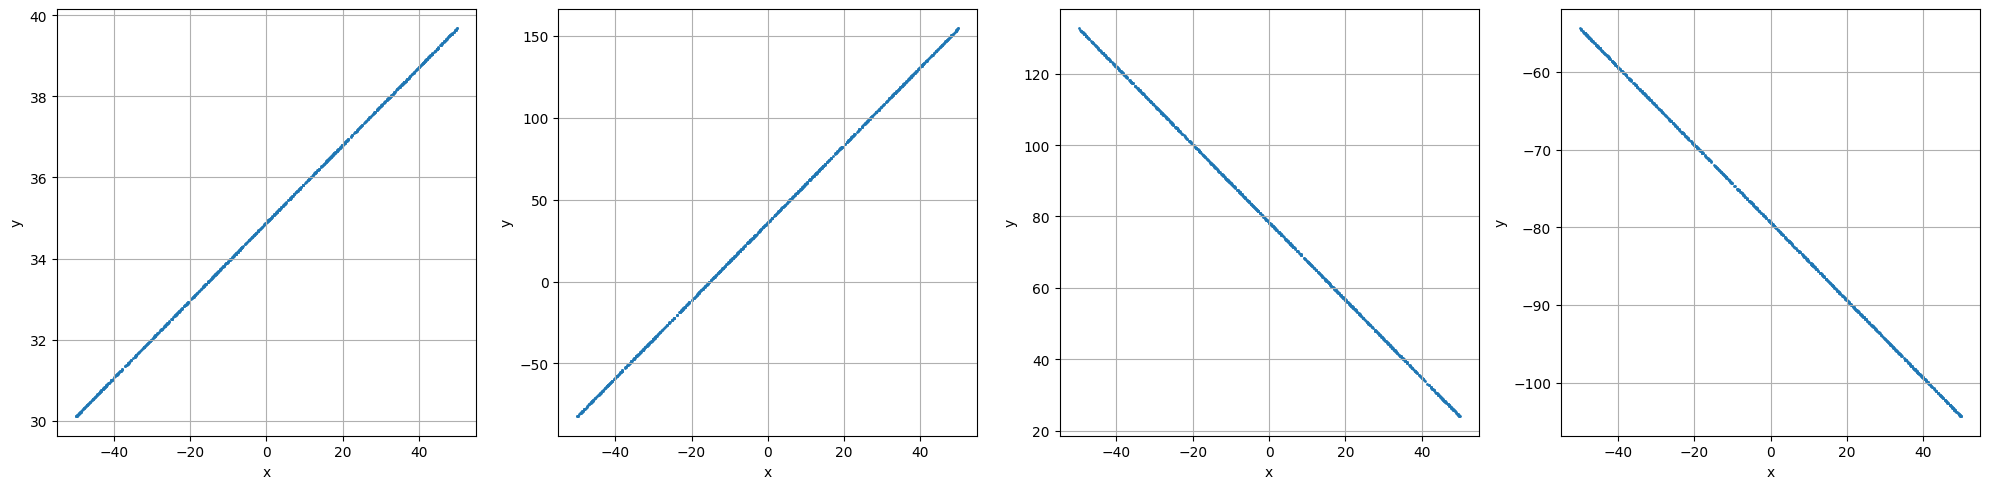

Sua tarefa é descrobrir a representação com a menor dimensão possível para codificar cada um dos exemplos. Qual seria esta representação?

Uma representação de 2 dimensões é possível, seguindo a função $ f(y) = ax + b $, como demonstrado abaixo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def decoder01(a, b):
    x = np.arange(-50, 50, 0.1)

    y = a * x + b

    plt.scatter(x, y, s=1)
    plt.grid()
    plt.show()

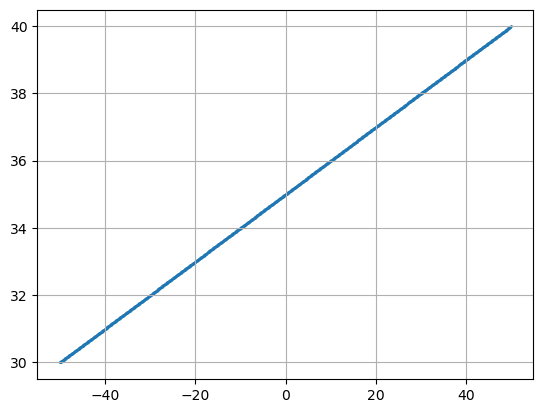

In [2]:
decoder01(0.1, 35)

---

## 2) Encoder intuitivo #2

No problema anterior, os $N$ exemplos disponíveis possuem a mesma estrutura que os 4 exemplos smotrados abaixo. Qual seria a representação agora?

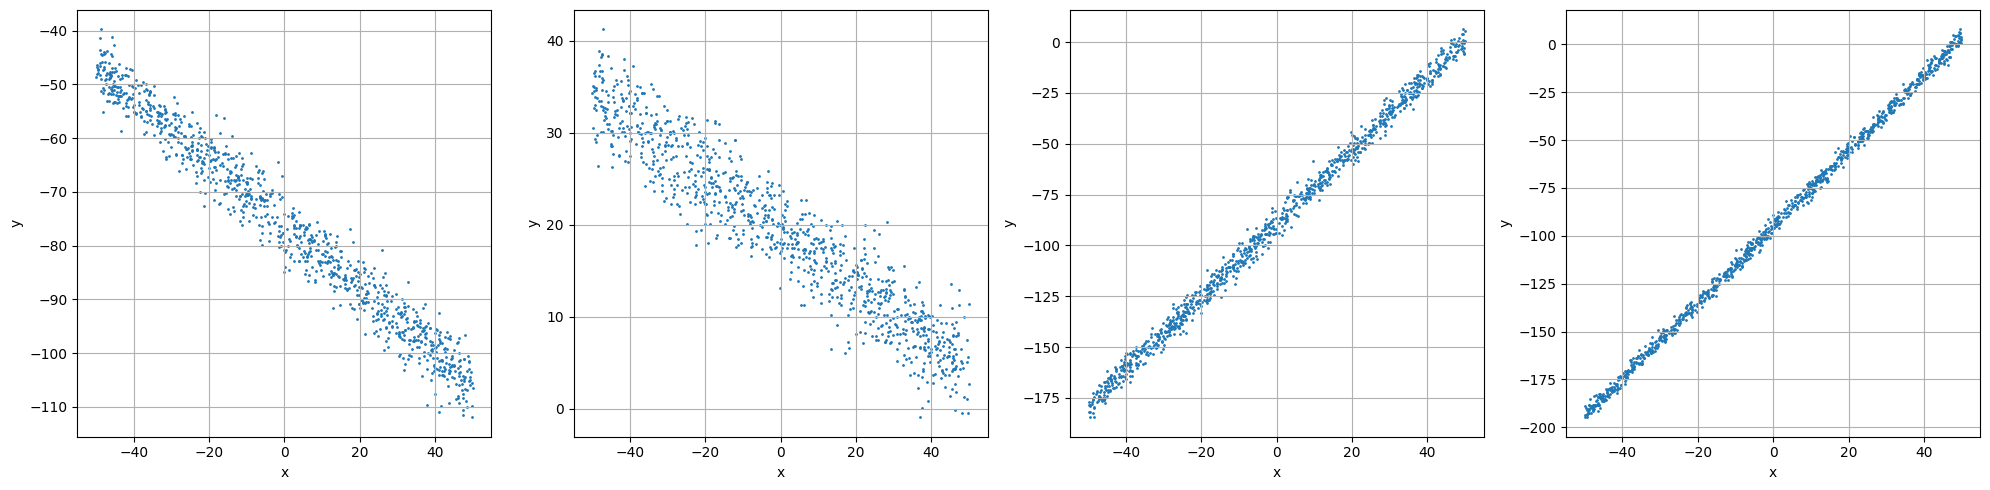

Uma representação de 3 dimensões é possível, seguindo a função $f(y) = ax + b + N(0, \sigma) $, sendo $ N(0, \sigma) $ um ruído onde $ \sigma $ é o desvio padrão.

In [3]:
def decoder02(a, b, sigma):
    x = np.arange(-50, 50, 0.1)

    rand = np.random.normal(0, sigma, size=1000)

    y = a * x + b + rand

    plt.scatter(x, y, s=1)
    plt.grid()
    plt.show()

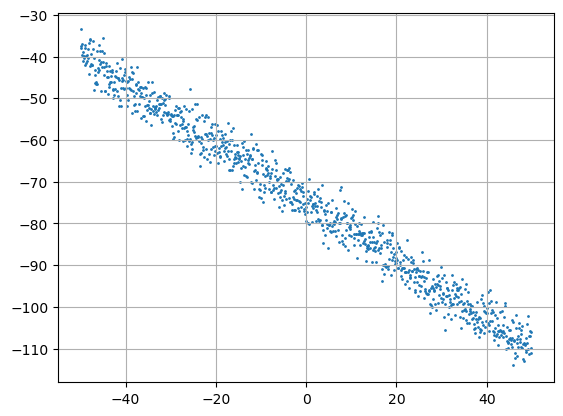

In [7]:
decoder02(-0.7, -75, 3)

---

## 3) Espiral de Arquimedes

Abaixo temos um scipt em Python que gera pontos aleatórios ao redor de uma espiral de Arquimedes. Você pode ler sobre essa espiral na web. Quando os pontos da espiral de Arquimedes são representados em coordenadas polares $(r, \theta)$, eles têm a forma $(b \theta, \theta)$. Ou seja, para um ponto com ângulo $\theta$, temos seu raio dado por $r(\theta) = b \theta$ onde $b$ é uma constante real positiva. O ângulo é restrito a $(0, 5 * 2 \pi]$. Isso significa que a espiral vai dar 5 voltas, aproximadamente.

Os pontos aleatórios são ligeiramente deslocados ao redor dessa espiral. Para fazer isso, adicionamos algum ruído gaussiano aleatório ao raio:
$r(\theta) = b \theta + N(0,\sigma^2)$ onde $\sigma$ é um pequeno valor representando o desvio padrão do ruído:

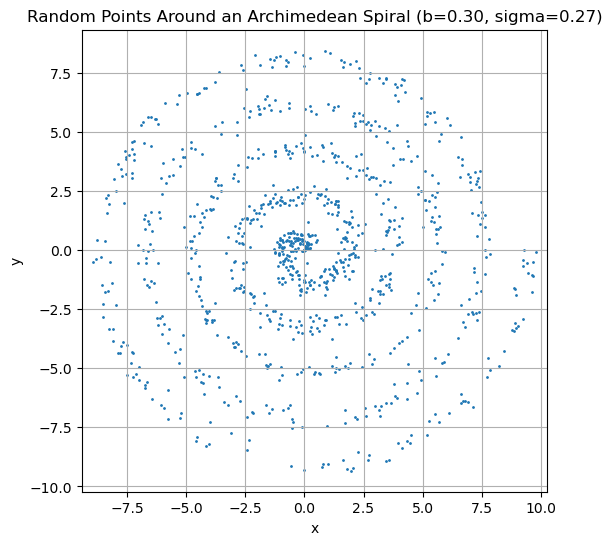

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_points(num_points):
    # Random constant b
    b = np.random.uniform(0.1, 1.0)
    # Standard deviation of the noise
    sigma = np.random.uniform(0.1, 0.3)

    # Generate random theta values between 0 and 5*2*pi
    theta = np.random.uniform(0, 10 * np.pi, num_points)

    # Generate the corresponding r values with noise
    r = b * theta + np.random.normal(0, sigma, num_points)

    # Convert polar coordinates to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return (x, y), (b, sigma)

# Call the function
num_points = 1000
(points, parameters) = generate_spiral_points(num_points)
x, y = points
b, sigma = parameters

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
plt.title(f'Random Points Around an Archimedean Spiral (b={b:.2f}, sigma={sigma:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

Imagine que um dataset grande é criado onde cada exemplo é um conjunto de 1000 pontos $(x_i, y_i)$ gerados a partir de uma chamada para generate_spiral_points(1000). Um autoencoder deve aprender a representação mais econômica de cada exemplo. O decodificador deve ser capaz de reproduzir da melhor maneira possível cada exemplo. Qual deve ser a dimensão do código? O que não é possível ou razoável ser representado?

A dimensão mínima será 2, representando $ b $ e $ \sigma $, podemos reconstruir a função geradora em função desses dois parâmetros como mostrado a seguir:

In [13]:
def decoder03(b, sigma):
    # Generate uniform theta values between 0 and 5*2*pi
    theta = np.random.uniform(0, 10 * np.pi, 1000)

    # Generate the corresponding r values with noise
    r = b * theta + np.random.normal(0, sigma, 1000)

    # Convert polar coordinates to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=1)
    plt.grid()
    plt.show()

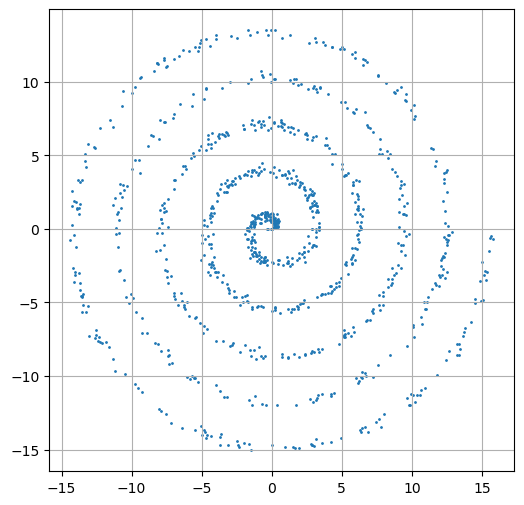

In [14]:
decoder03(0.5, 0.2)